## 1. Data Management
- Gathering data
- Data preprocessing
- Cleaning
- Metadata extraction
- Exploratory data analysis

In [1]:
# Add Python libraries here.
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### 1-1. Read data files.
- According to the data description, the author uses 'NA' for 'No basement', 'No fireplace' and etc.
- If 'keep_default_na=False', and na_values are not specified, no strings will be parsed as NaN.
- Replace 'NA' to 'No'
- Manually search for possible other forms of missing values.

In [2]:
# Read the data files.
# According to the data description, the author uses 'NA' for 'No basement', 'No fireplace' and etc.
# If keep_default_na is False, and na_values are not specified, no strings will be parsed as NaN.
train_df = pd.read_csv("train.csv", keep_default_na=False)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [4]:
#set(train_df['MSZoning'])

In [5]:
# According to data description file, the most columns uses 'NA' as 'No fireplace', 'No basement' and etc.
# However, MasVnrType column contains 'NA' without any designation. Then it should be missing value.
set(train_df['MasVnrType'])

{'BrkCmn', 'BrkFace', 'NA', 'None', 'Stone'}

In [6]:
# The 8 rows contain 'NA'.
train_df.loc[train_df['MasVnrType'] == 'NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NA,7851,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
529,530,20,RL,NA,32668,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
650,651,60,FV,65,8125,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
936,937,20,RL,67,10083,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
973,974,20,FV,95,11639,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
977,978,120,FV,35,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1243,1244,20,RL,107,13891,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1278,1279,60,RL,75,9473,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


In [7]:
# Change all other columns except ['MasVnrType','MarVnrArea'] columns from 'NA' to 'None'.
# 'No' indicates no equipment, place and etc.
train_df[train_df.columns.difference(['MasVnrType','MarVnrArea'])] = \
train_df[train_df.columns.difference(['MasVnrType','MarVnrArea'])].replace('NA','No') 

In [8]:
# See if other types of missing values in the training set.
train_df[['MasVnrType','MasVnrArea']] = \
train_df[['MasVnrType','MasVnrArea']].replace('NA',np.nan)

In [9]:
# Check. 
train_df.loc[train_df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,No,7851,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2010,WD,Normal,216500
529,530,20,RL,No,32668,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,3,2007,WD,Alloca,200624
650,651,60,FV,65,8125,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2008,WD,Normal,205950
936,937,20,RL,67,10083,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,8,2009,WD,Normal,184900
973,974,20,FV,95,11639,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,12,2008,New,Partial,182000
977,978,120,FV,35,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,No,No,No,0,11,2007,New,Partial,199900
1243,1244,20,RL,107,13891,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,9,2006,New,Partial,465000
1278,1279,60,RL,75,9473,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,3,2008,WD,Normal,237000


In [10]:
# Drop the rows with missing values.
train_df = train_df.dropna()

In [11]:
# No missing values.
train_df.isnull().any().sum()

0

In [12]:
# 1460 -> 1452 rows.
train_df.shape

(1452, 81)

### 1-2. Correlation Matrix
- Assume the linear relationship between the features and outpus.
- Use the correaltion 0.5 as threshold to reduce dimension of the data set.

In [13]:
# Correlation matrix.
corrmat = train_df.corr()

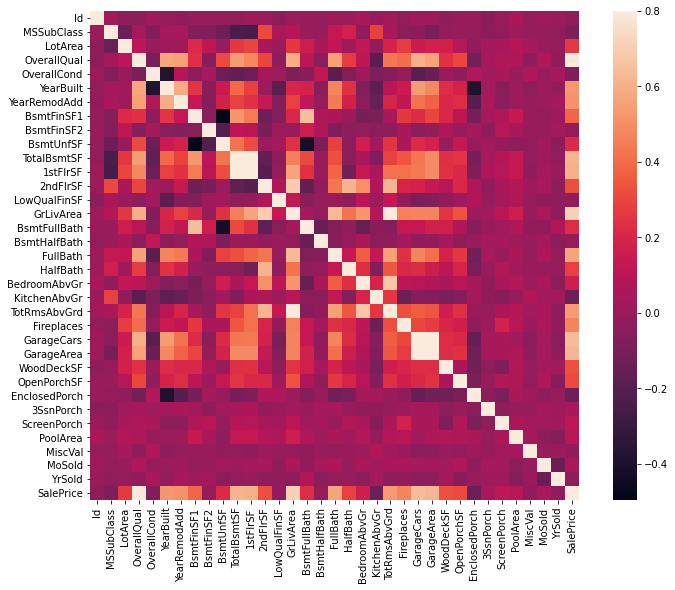

In [14]:
# Plot the correlation matrix.
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
#Find out which paramters appear to have an appreciable linear relationship with SalePrice
print("List of parameters that have a good linear model fit to Sale Price")
for i in range(len(corrmat["SalePrice"])-1):
    #Likely to be a linear relationship
    if((corrmat["SalePrice"][i] > 0.5 or corrmat["SalePrice"][i] < -0.5)):
        print(corrmat.columns[i], corrmat["SalePrice"][i])

List of parameters that have a good linear model fit to Sale Price
OverallQual 0.7899971370270409
YearBuilt 0.5228961642833532
YearRemodAdd 0.5071578111064072
TotalBsmtSF 0.6129709309793492
1stFlrSF 0.6068493756111804
GrLivArea 0.7100796834099282
FullBath 0.5624912629814626
TotRmsAbvGrd 0.5363108545464506
GarageCars 0.6396857385608429
GarageArea 0.6224917130672075


In [16]:
# Correlation between SalePrice and other variables.
# Sorted from the least to the most correlated.
corrmat.loc['SalePrice'].abs().sort_values()[:-1]

BsmtFinSF2       0.010316
BsmtHalfBath     0.015993
MiscVal          0.020951
LowQualFinSF     0.025263
Id               0.025343
YrSold           0.026180
MoSold           0.045136
3SsnPorch        0.045247
OverallCond      0.076294
MSSubClass       0.082813
PoolArea         0.093109
ScreenPorch      0.113044
EnclosedPorch    0.128778
KitchenAbvGr     0.137419
BedroomAbvGr     0.171934
BsmtUnfSF        0.215740
BsmtFullBath     0.225027
LotArea          0.264674
HalfBath         0.282040
OpenPorchSF      0.311268
2ndFlrSF         0.322710
WoodDeckSF       0.324650
BsmtFinSF1       0.383977
Fireplaces       0.468930
YearRemodAdd     0.507158
YearBuilt        0.522896
TotRmsAbvGrd     0.536311
FullBath         0.562491
1stFlrSF         0.606849
TotalBsmtSF      0.612971
GarageArea       0.622492
GarageCars       0.639686
GrLivArea        0.710080
OverallQual      0.789997
Name: SalePrice, dtype: float64

In [17]:
#We are going to want data parameters to have a significant amount of data for proper training
#Thus, Alley, PoolQC, Fence, MiscFeature all should be removed for low values
#FireplaceQu also only has half total data, possible need for removal as well
##ID column merely shows the row number of each sample
#Has no relationship with sale price so can also remove
train_df = train_df.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],axis=1)

### 1-3. Find outliers and remove them.
- Use scatter plots with the 3 highly correlated features vs Saleprice.
- GrLivArea vs SalePrice: There are some outliers at bottom-right.
- GarageArea vs SalePrice: There are some outliers at bottom-right and top-mid.

In [18]:
# GrLivArea and GarageArea columns have relatively large correlation with the SalePrice.
# Use scatterplots to detect the outliers.
def visualDetectionOutlier(train_df):
    sp = train_df['SalePrice']
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(7,12))
    axes[0].scatter(x=train_df['GrLivArea'],y=sp, alpha=0.5)
    axes[0].set_title("GrLivArea vs SalePrice")
    axes[0].set_xlabel("sqft")
    axes[0].set_ylabel("Price")
    axes[1].scatter(x=train_df['GarageArea'],y=sp, alpha=0.5)
    axes[1].set_title("GarageArea vs SalePrice")
    axes[1].set_xlabel("sqft")
    axes[1].set_ylabel("Price")
    fig.tight_layout()
    plt.show()

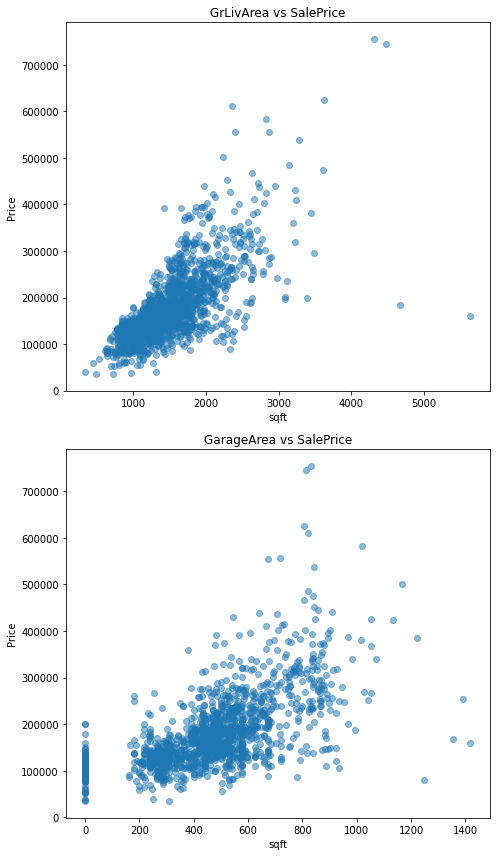

In [19]:
# Before removing outliers.
visualDetectionOutlier(train_df)

In [20]:
# [Plot 1: GrLivArea vs SalePrice] Bottom right two points look like outliers.
ol_plot1_bottomright = train_df.loc[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)]
ol_plot1_bottomright

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [21]:
# [Plot 2: GarageArea vs SalePrice] Bottom right four points look like outliers.
ol_plot2_bottomright = train_df.loc[((train_df['GarageArea'] > 1200) & (train_df['SalePrice'] < 300000))]
ol_plot2_bottomright

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,20,RL,98,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,New,Partial,253293
1061,30,C (all),120,18000,Grvl,Reg,Low,AllPub,Inside,Gtl,...,0,0,0,0,560,8,2008,ConLD,Normal,81000
1190,190,RL,No,32463,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,3,2007,WD,Normal,168000
1298,60,RL,313,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [22]:
# [Plot 2: GarageArea vs SalePrice] Top middle two points look like outliers.
ol_plot2_topmiddle = train_df.loc[((train_df['GarageArea'] > 800) & (train_df['GarageArea'] < 1000)) & (train_df['SalePrice'] > 700000)]
ol_plot2_topmiddle

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,60,RL,160,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [23]:
# Remove the outliers.
train_df = train_df.drop(ol_plot1_bottomright.index.append(ol_plot2_bottomright.index).
                         append(ol_plot2_topmiddle.index))

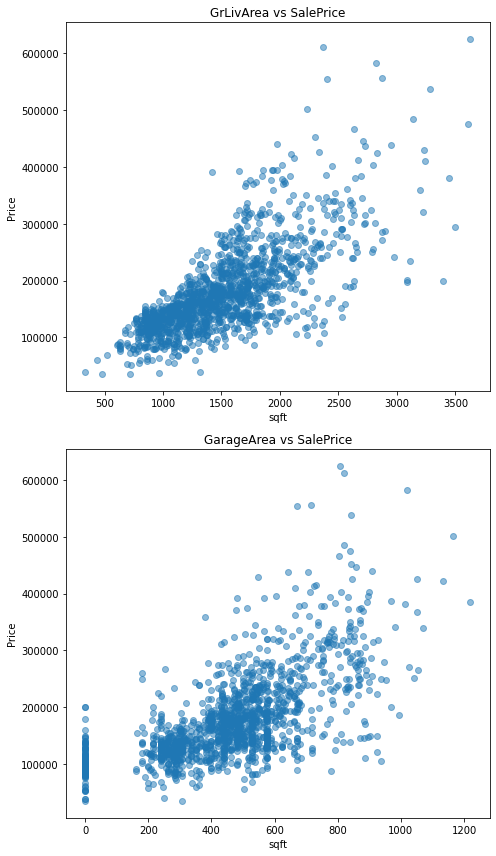

In [24]:
# Check out the linearity again.
visualDetectionOutlier(train_df)

### 1-4. Data transformation for ANN.
    - train_df: Original data without missing values and outliers.
    - ann_train_df: train_df with transformed data.

In [25]:
# Use the copied dataframe to preserve the original.
ann_train_df = train_df.copy(deep=True)

In [26]:
# For ANN analysis, perform standardization to numeric columns and one-hot-encoding to categorical columns.
ann_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1445 non-null   int64 
 1   MSZoning       1445 non-null   object
 2   LotFrontage    1445 non-null   object
 3   LotArea        1445 non-null   int64 
 4   Street         1445 non-null   object
 5   LotShape       1445 non-null   object
 6   LandContour    1445 non-null   object
 7   Utilities      1445 non-null   object
 8   LotConfig      1445 non-null   object
 9   LandSlope      1445 non-null   object
 10  Neighborhood   1445 non-null   object
 11  Condition1     1445 non-null   object
 12  Condition2     1445 non-null   object
 13  BldgType       1445 non-null   object
 14  HouseStyle     1445 non-null   object
 15  OverallQual    1445 non-null   int64 
 16  OverallCond    1445 non-null   int64 
 17  YearBuilt      1445 non-null   int64 
 18  YearRemodAdd   1445 non-null

In [27]:
# According to the data description, these numeric columns are actually categorical columns.
num_to_cat_list = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 
                             'YearBuilt','YearRemodAdd','MoSold','YrSold']
# Transform numeric data types into string data type.
ann_train_df[num_to_cat_list] = ann_train_df[num_to_cat_list].astype(str)
ann_train_df[num_to_cat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1445 non-null   object
 1   OverallQual   1445 non-null   object
 2   OverallCond   1445 non-null   object
 3   YearBuilt     1445 non-null   object
 4   YearBuilt     1445 non-null   object
 5   YearRemodAdd  1445 non-null   object
 6   MoSold        1445 non-null   object
 7   YrSold        1445 non-null   object
dtypes: object(8)
memory usage: 101.6+ KB


In [28]:
# The data type should be floating point because it indicates sqft.
ann_train_df['MasVnrArea'] = ann_train_df['MasVnrArea'].astype(np.float)
ann_train_df['MasVnrArea'].dtype

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


dtype('float64')

In [29]:
#ann_train_df.info()

In [30]:
# The numeric columns.
num_cols = ann_train_df.select_dtypes(include=[np.number])
num_cols

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450,196.0,706,0,150,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,9600,0.0,978,0,284,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,11250,162.0,486,0,434,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,9550,0.0,216,0,540,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0.0,0,0,953,953,953,694,0,1647,...,2,460,0,40,0,0,0,0,0,175000
1456,13175,119.0,790,163,589,1542,2073,0,0,2073,...,2,500,349,0,0,0,0,0,0,210000
1457,9042,0.0,275,0,877,1152,1188,1152,0,2340,...,1,252,0,60,0,0,0,0,2500,266500
1458,9717,0.0,49,1029,0,1078,1078,0,0,1078,...,1,240,366,0,112,0,0,0,0,142125


In [31]:
# The numeric column names.
num_col_names = num_cols.columns
num_col_names

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [32]:
# Transform numerical features by scaling each feature to a given range.
scaler = MinMaxScaler()
ann_train_df[num_col_names] = scaler.fit_transform(train_df[num_col_names])
ann_train_df[num_col_names]

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,0.033420,0.122500,0.322669,0.000000,0.064212,0.266999,0.180373,0.469747,0.0,0.417856,...,0.50,0.449180,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.294187
1,0.038795,0.000000,0.446984,0.000000,0.121575,0.393637,0.320663,0.000000,0.0,0.281810,...,0.50,0.377049,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.248432
2,0.046507,0.101250,0.222121,0.000000,0.185788,0.286962,0.202488,0.476348,0.0,0.440935,...,0.50,0.498361,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.319607
3,0.038561,0.000000,0.098720,0.000000,0.231164,0.235808,0.216655,0.415842,0.0,0.419982,...,0.75,0.526230,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.178105
4,0.060576,0.218750,0.299360,0.000000,0.209760,0.357143,0.280235,0.579208,0.0,0.566049,...,0.75,0.685246,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,0.364514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.000000,0.000000,0.000000,0.407962,0.297255,0.213891,0.381738,0.0,0.398725,...,0.50,0.377049,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.237417
1456,0.055505,0.074375,0.361060,0.110583,0.252140,0.480973,0.600898,0.000000,0.0,0.528090,...,0.50,0.409836,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.296729
1457,0.036187,0.000000,0.125686,0.000000,0.375428,0.359326,0.295093,0.633663,0.0,0.609171,...,0.25,0.206557,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.392476
1458,0.039342,0.000000,0.022395,0.698100,0.000000,0.336245,0.257084,0.000000,0.0,0.225934,...,0.25,0.196721,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.181706


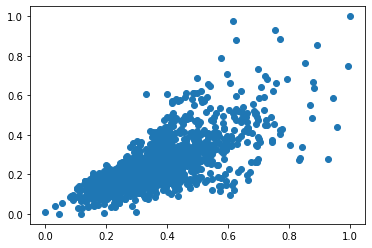

In [33]:
# Check the scaling. Roughly same proportion.
fig = plt.figure()
ax = plt.scatter(x=ann_train_df['GrLivArea'],y=ann_train_df['SalePrice'])
plt.show()

In [34]:
# Find the categorical columns.
cat_cols = train_df.select_dtypes(exclude=[np.int,np.float])
cat_cols

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and 

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,65,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,No,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,RL,80,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,RL,68,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,RL,60,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,RL,84,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,2000,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,TA,Attchd,1999,RFn,TA,TA,Y,WD,Normal
1456,RL,85,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Min1,TA,Attchd,1978,Unf,TA,TA,Y,WD,Normal
1457,RL,66,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Typ,Gd,Attchd,1941,RFn,TA,TA,Y,WD,Normal
1458,RL,68,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,No,Attchd,1950,Unf,TA,TA,Y,WD,Normal


In [35]:
# The categorical columns names.
cat_col_names = cat_cols.columns
cat_col_names

Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
# One-hot encoding the categorical columns.
ann_train_df = pd.get_dummies(train_df, columns=cat_col_names, prefix=cat_col_names, drop_first=True)
ann_train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


## 2. Machine Learning and Algorithms
- Executing and developing all aspects of machine learning
- Developing a machine learning model from feature engineering all the way prediciton model
- Active learning

- Data frame to be used: train_df for linear regression

- Two dataframes to work on:
    - train_df -> only removed missing values, and outliers.
    - ann_train_df -> Removed missing values, and outliers. Also min-max scaled the numerical columns and one-hot-encode the categorical columns.

### 2.1 k-NN regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [38]:
# Split the data set. (80:20 = traning:test)
train, test = train_test_split(train_df, test_size=0.2,random_state=21)

In [39]:
num_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [40]:
# Drop categorical cols for X portion of data set. 
# For y portion of data set, select only satisfied column.
X_train, y_train = train[num_cols].copy(), train['SalePrice']
X_test, y_test = test[num_cols].copy(), test['SalePrice']

In [41]:
X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
985,10880,0,1040,0,124,1164,1164,0,0,1164,...,1,240,0,48,0,0,0,0,0,125000
188,7018,275,1086,0,0,1086,1224,0,0,1224,...,2,528,120,0,0,0,0,0,0,153337
90,7200,0,0,0,0,0,1040,0,0,1040,...,2,420,0,29,0,0,0,0,0,109900
84,8530,22,0,0,384,384,804,670,0,1474,...,2,400,120,72,0,0,0,0,700,168500
508,9600,0,141,0,548,689,689,689,0,1378,...,2,360,0,0,116,0,0,0,0,161000


In [42]:
y_train.head()

985    125000
188    153337
90     109900
84     168500
508    161000
Name: SalePrice, dtype: int64

In [43]:
# Scaler for kNN.
scaler_knn = MinMaxScaler()

# Fit and transform the X_train and X_test sets.
X_train_scaled = scaler_knn.fit_transform(X_train)
X_test_scaled = scaler_knn.fit_transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
# Define k-NN model.
KNN = KNeighborsRegressor(n_neighbors=5, algorithm='auto', weights='uniform')

In [46]:
# Fit the model.
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [47]:
# Predict the values by using X_test.
y_pred = KNN.predict(X_test)
y_pred

array([ 86700. , 110441.8, 340478.6, 140300. ,  97580. ,  80160. ,
       200100. , 177960. , 287418. , 153847.4, 157680. , 143300. ,
       164438. , 211900. , 187660. , 153015. , 143300. , 419274. ,
       127600. , 171200. , 186628. , 244500. , 159779. , 373424.4,
       122100. , 124680. , 185650. ,  44840. , 170657. , 175900. ,
        44840. , 231320. ,  94550. , 325184.8, 265775.8, 190190. ,
       157680. , 174800. , 327124.8, 375965.6, 131300. , 119700. ,
       127435. ,  63476.6, 136600. , 175763.4, 229900. , 170198. ,
       139680. , 277580. , 145910.4, 175326.6, 112300. , 176097. ,
       293360. , 389003.8, 170657. , 158980. , 237859.8, 139700. ,
       107260. , 221900. , 200008.2,  68380. , 158200. , 204780. ,
       333800. , 138100. , 220800. , 169157. , 105460. , 238900. ,
       119000. , 245865.6, 136800. , 150680. , 147760. , 130180. ,
       109880. , 177408. , 108300. , 234225.6, 180360. , 209900. ,
       115110. , 194696. , 558201.6, 249940. , 225520. ,  5529

In [48]:
# Coefficient of determination. Best possible score is 1.0.
r2_score(y_test, y_pred)

0.9996886017811465

### 2.2: Support Vector Regression (SVR)

In [49]:
# Split the data set in 80:20 ratio for training:test
train, test = train_test_split(train_df, test_size=0.2,random_state=21)

In [50]:
# Same as above: drop the categorical attributes
X_train, y_train = train[num_cols].copy(), train['SalePrice']
X_test, y_test = test[num_cols].copy(), test['SalePrice']
X_train.head(5)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
985,10880,0,1040,0,124,1164,1164,0,0,1164,...,1,240,0,48,0,0,0,0,0,125000
188,7018,275,1086,0,0,1086,1224,0,0,1224,...,2,528,120,0,0,0,0,0,0,153337
90,7200,0,0,0,0,0,1040,0,0,1040,...,2,420,0,29,0,0,0,0,0,109900
84,8530,22,0,0,384,384,804,670,0,1474,...,2,400,120,72,0,0,0,0,700,168500
508,9600,0,141,0,548,689,689,689,0,1378,...,2,360,0,0,116,0,0,0,0,161000


In [51]:
y_train.head(5)

985    125000
188    153337
90     109900
84     168500
508    161000
Name: SalePrice, dtype: int64

In [91]:
from sklearn.svm import SVR
from sklearn import preprocessing

# Scale the training data
scaler_svr = preprocessing.StandardScaler()
scaler_svr.fit(X_train)

StandardScaler()

In [94]:
# Fit SVR with linear kernel
svr = SVR(kernel='linear')
svr.fit(scaler_svr.transform(X_train), np.asarray(y_train))
y_pred_svr = svr.predict(scaler_svr.transform(X_test))
y_pred_svr

array([163468.86906869, 159149.88699132, 173606.79083903, 160257.04787685,
       156452.30962814, 151713.26443707, 166984.22804345, 166862.11328052,
       169276.83257587, 162355.41241267, 161338.37714576, 161811.66283924,
       162910.43366345, 161948.05119019, 166503.43709918, 161642.61489387,
       161603.61523637, 174177.22609755, 157837.85587931, 164269.31608145,
       167376.12050085, 170275.47696533, 158228.24003686, 170819.51194705,
       163541.60900796, 159227.89335208, 162220.54782239, 152001.88637974,
       162002.89635161, 162635.78989885, 155519.71143609, 168244.05653466,
       155624.41488399, 167298.21671906, 166448.73747031, 163808.81094448,
       161830.86703799, 162820.07204172, 167026.08519029, 172299.03604459,
       162284.56661327, 158588.53078312, 160556.22670979, 157065.93599757,
       161985.23255888, 162832.94514077, 164825.75402311, 163922.50175018,
       160334.70986012, 174041.92549442, 160746.65334129, 162288.23013936,
       154699.59950173, 1

In [95]:
# Find the score
r2_score(y_test, y_pred_svr)

0.07050493867037

## 3. UI/UX and Data Visualization
- EDA
- Data understanding